# Ciencia de Datos. TP5: Inferencia Bayesiana

Axel Maddonni, LU 200/14 <br>
Federico Patane, LU 683/10<br>


*Noviembre 2017*

***

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pymc3 as pm
import seaborn as sns
from scipy import stats

In [2]:
def test_model(*args, **kwargs):
    basic_model = pm.Model()
    
    n = kwargs.get('n', None)
    h = kwargs.get('h', None)
    alpha = kwargs.get('alpha', None)
    beta = kwargs.get('beta', None)
    niter = kwargs.get('niter', None)
    
    if (n is None or h is None or alpha is None or beta is None):
        print("Falta un parametro")
        return

    niter = 2000 if niter is None else niter

    with basic_model:
        # Priors for unknown model parameters
        theta = pm.Beta('theta', alpha=alpha, beta=beta)

        # Likelihood (sampling distribution) of observations
        k = pm.Binomial('k', p=theta, n=n, observed=h)

        # Inference
        trace = pm.sample(niter, step=pm.Metropolis(), progressbar=True)

    print(trace['theta'])

    plt.figure(figsize=(15,10))
    plt.title("Posteriori, luego de %i caras usando como prior Beta(%i,%i)" %(h, alpha, beta))
    sns.distplot(trace['theta'], label='post')
    x = np.linspace(0, 1, 100)
    plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
    plt.legend(loc='best');
    plt.show()

    map_estimate = pm.find_MAP(model=basic_model)
    print("Media de la posteriori obtenida para theta: ", trace['theta'].mean())
    print("MAP obtenido para theta: ", map_estimate['theta'])

    with basic_model:
        post_pred = pm.sample_ppc(trace, samples=1, size=1)

    print("Prediccion de una nueva tirada: ", post_pred)
    #  como se interpreta esto? de 6 salen 6? hay que modificar n?

100%|██████████| 2500/2500 [00:00<00:00, 10444.17it/s]


[ 0.59110502  0.56825642  0.56082178 ...,  0.92925118  0.92925118
  0.95371194]


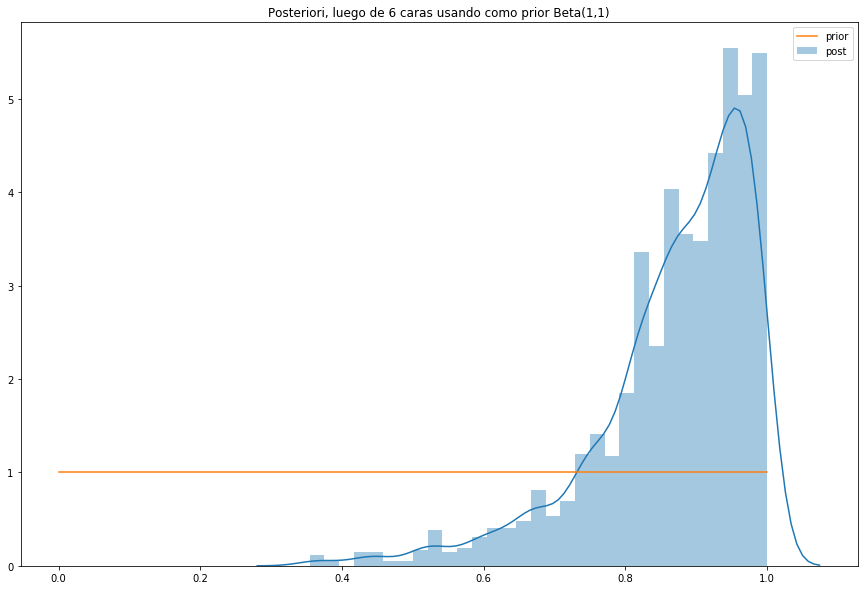

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 3148.52it/s]  
100%|██████████| 1/1 [00:00<00:00, 1466.03it/s]

Media de la posteriori obtenida para theta:  0.86935083438
MAP obtenido para theta:  0.9999984620831801
Prediccion de una nueva tirada:  {'k': array([[5]])}


In [3]:
test_model(n=6,h=6,alpha=1,beta=1)

In [4]:
test_model(n=6,h=6,alpha=100,beta=100)

100%|██████████| 2500/2500 [00:00<00:00, 8800.43it/s]


[ nan  nan  nan ...,  nan  nan  nan]


ValueError: cannot convert float NaN to integer

100%|██████████| 2500/2500 [00:00<00:00, 10283.07it/s]


[ 0.90044263  0.90044263  0.90044263 ...,  0.97341319  0.96660014  0.869713  ]


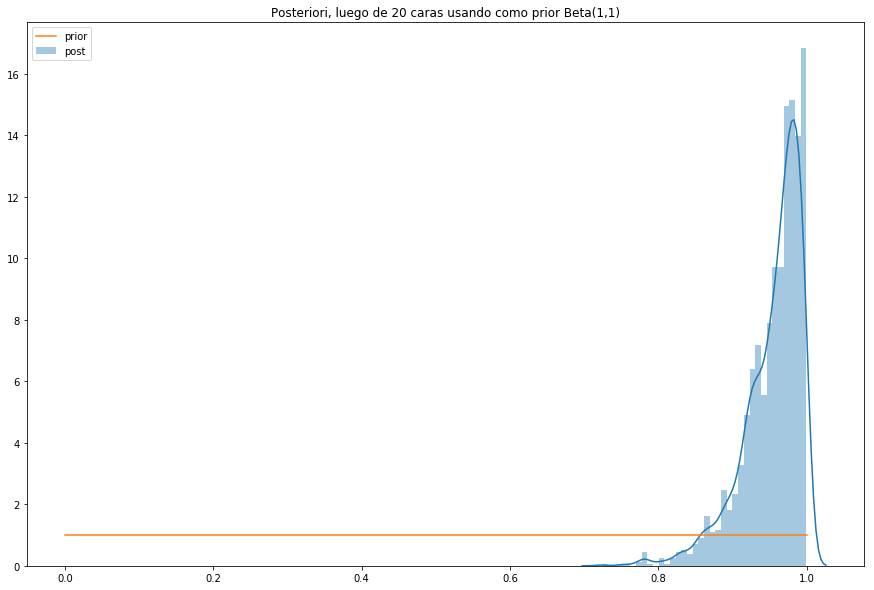

logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 3146.30it/s]  
100%|██████████| 1/1 [00:00<00:00, 2959.99it/s]

Media de la posteriori obtenida para theta:  0.954288984251
MAP obtenido para theta:  0.9999996155210419
Prediccion de una nueva tirada:  {'k': array([[15]])}


In [6]:
test_model(n=20,h=20,alpha=1,beta=1)

100%|██████████| 2500/2500 [00:00<00:00, 9894.68it/s]


[ 0.98907866  0.89750297  0.89750297 ...,  0.98779042  0.9769995   0.9769995 ]


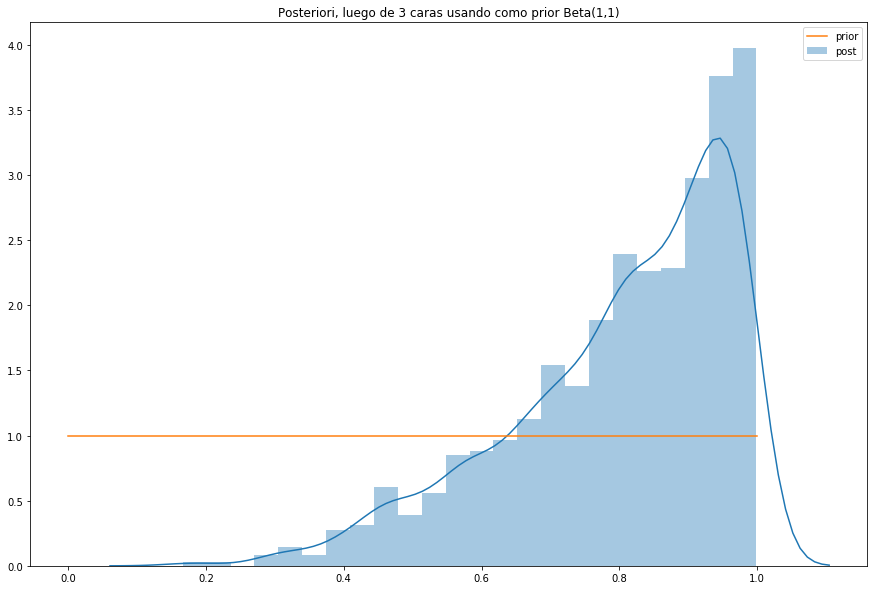

logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 3716.79it/s]  
100%|██████████| 1/1 [00:00<00:00, 1848.53it/s]

Media de la posteriori obtenida para theta:  0.802072027434
MAP obtenido para theta:  0.999996924163579
Prediccion de una nueva tirada:  {'k': array([[3]])}


In [7]:
test_model(n=3,h=3,alpha=1,beta=1)